#  Relative Frequencies and Probabilities


Now consider how we can more formally define relative frequency and its properties. Consider a random experiment with a finite sample space, $S$. Let $|S|=K$; i.e., there are $K$ possible outcomes. Consider repeating the experiment a fixed number of times and observing the sequence of outcomes. This is a *repeated experiment*, which is a special type of *composite experiment*:
````{card}
DEFINITION
^^^
```{glossary}
compound experiment
  A compound experiment is any experiment that consists of multiple sub-experiments.
```
````
````{card}
DEFINITION
^^^
```{glossary}
trial (compound experiments)
  A trial in a compound experiment is one of the sub-experiments that make up the composite experiment.
```
````

````{card}
DEFINITION
^^^
```{glossary}
repeated experiment
  A repeated experiment is a compound experiment in which the trials are identical and independent of each other.
```
````

Here, by *independent*, we mean that what happens on one experiment cannot affect the probabilities of what happens on another experiment. We will define this concept of independence more carefully later.

Let $N$ denote the number of trials in the repeated experiment, and consider a particular outcome of the experiment. If we indexed the sample space $S$, then we can assign an index $k$ to this outcome, and we will refer to it as outcome $k$ for convenience. Note that we use the lowercase letter $k$ to refer to one of the outcomes, whereas $K$ refers to the total number of outcomes. This is a common convention in probability. In fact, we will often use lowercase and uppercase letters to refer to related phenomena. **It is important to use fonts or write letters so that uppercase and lowercase are distinguishable to readers**. When writing letters, the convention is to use curvier forms and loops on lower case versions to make it clear that they are lower case. 

**JMS: Add examples here**

The relative frequency of outcome $k$ is the proportion of times that outcome occurred in the $N$ trials. Let 
$n_k(N)$ denote the number of times outcome $k$ is observed. We can immediately see that 

$$
0 \le n_k(N) \le N,
$$ (occurrence_values)
since the result is a counting number and the most number of times that outcome $k$ can occur is if it occurs on every one of the $N$ trials.

Since each trial results in one outcome, then the sum of the number of times each outcome is observed must equal the number of trials:

$$
\sum_{k=1}^{K} n_k(N) =N.
$$ (sum_num_occurrences)

Let $r_k (N)$ denote the relative frequency of outcome $k$:

$$
r_k(N) =\frac{n_k(N)}{N}.
$$

We can immediately derive a few properties of relative frequencies. Dividing {eq}`occurrence_values` by $N$ yields

$$
0 \le r_k(N) \le 1,
$$
so relative frequencies are values between 0 and 1 (inclusive of both endpoints). Dividing {eq}`sum_num_occurrences` by $N$ yields

$$
\sum_{k=1}^{K} r_k (N) = 1,
$$
so the sum of the relative frequencies is equal to 1. 

Many random experiments possess properties that are sometimes referred to as *statistical regularity*. For our purposes, we will use the following definition:

````{card}
DEFINITION
^^^
```{glossary}
statistical regularity
  An experiment has statistical regularity if under repeated experiments, the relative frequencies converge (in some sense) to some fixed values. 
```
````

To see this, let's simulate rolling a fair six-sided die and plot the relative frequencies for several increasing values of $N$. We can generate random numbers between 1 and 6 (inclusive) using NumPy.random's `randint` function. Since `randint` uses the Pythonic convention that the upper endpoint is **not included**, we have to pass an upper endpoint of 7 instead of 6. Here is how to generate 20 dice values:

In [1]:
import numpy as np
import numpy.random as npr

npr.seed(9823467)
outcomes = npr.randint(1, 7, size=20)
outcomes

array([6, 3, 6, 4, 2, 2, 4, 3, 3, 6, 5, 2, 5, 6, 1, 5, 5, 6, 1, 4])

Now we need to count the number of occurrences of each value. We can achieve this by passing the outcomes to NumPy's `unique` function and using the keyword parameters `return_counts=True`. The function returns two arrays. The first array contains the unique values in the `outcomes` array, and the second array returns the corresponding count for each observed value.

In [2]:
vals, counts = np.unique(outcomes, return_counts=True)
print(vals, counts)

[1 2 3 4 5 6] [2 3 3 3 4 5]


Then the relative frequencies of the values is just the returned counts divided by the total number of outcomes:

In [3]:
rel_freqs = counts / len(outcomes)

print("Relative frequencies:")
for i, val in enumerate(vals):
    print(val, rel_freqs[i])

Relative frequencies:
1 0.1
2 0.15
3 0.15
4 0.15
5 0.2
6 0.25


When we visualize relative frequencies, we typically use a stem plot, which shows the value as a circle at the top of a "stem" that  connects to the $x$-axis:

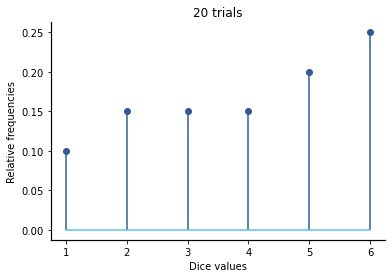

In [4]:
import matplotlib.pyplot as plt

plt.stem(vals, rel_freqs, use_line_collection=True)
plt.xlabel("Dice values")
plt.ylabel("Relative frequencies")
plt.title("20 trials");

The values show some pretty significant differences in the relative frequencies (from 0.1 to 0.25). Let's see how the relative frequencies change as we vary $N$ from 10 to 100,000. We will generate all 100,000 values at once and then subscript the array when we want to limit the analysis to a particular part. For instance, we can get the first 10 values as follows:

In [5]:
outcomes100k = npr.randint(1, 7, size=100_000)
print(outcomes100k[:10])

[3 4 6 4 2 3 5 3 5 3]


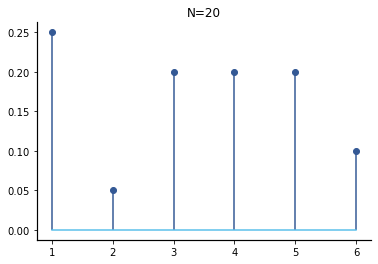

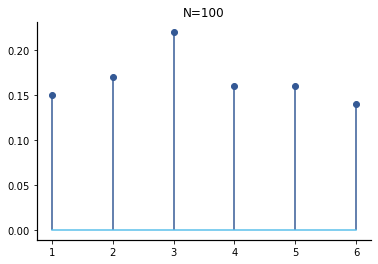

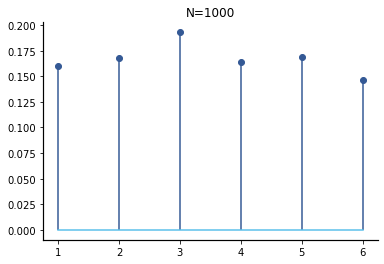

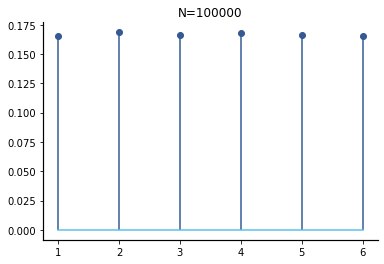

In [6]:
Ns = [20, 100, 1000, 100_000]

for N in Ns:
    outcomes = outcomes100k[:N]
    vals, counts = np.unique(outcomes, return_counts=True)
    rel_freqs = counts / len(outcomes)
    plt.figure()
    plt.stem(vals, rel_freqs, use_line_collection=True)
    plt.title("N=" + str(N));

As the value of $N$ increases, the relative frequencies converge to a common value:

In [7]:
print(rel_freqs)

[0.16541 0.16857 0.1666  0.16792 0.16585 0.16565]



The relative frequencies converge to a value around 0.166, which is close to 1/6. If we further increase the number of trials, the relative frequencies will get closer and closer to 1/6. For an experiment with statistical regularity like this, we can say that the values that the relative frequencies converge to are the *probabilities* of the outcomes. The probability of outcome $k$ can be denoted by $p_k$.

Note that probabilities then inherit the properties of relative frequencies:

$$0 \le p_k \le 1, \mbox{ and}$$

$$\sum_k p_k = 1~~~~~~~~$$

We will require these properties to hold for all probabilities.

However, defining probabilities in this way has some problems:
* Not all experiments possess statistical regularity.  In particular, some experiments can never be repeated, such as the change in the S&P 500 Index of the U.S. stock market on a given day. 
* Even if an experiment has statistical regularity, some experiments cannot be repeated without great difficulty or expense, such as the amount of fuel required to send a SpaceX rocket to Mars.
* If an experiment has statistical regularity and can be repeated, it is not clear how to determine how many trials are needed to determine the probabilities with some prescribed precision. For experiments, even the meaning of "converge" is not clear because there is no way to relate precision with a required number or trials.

Because of these limitations, we usually try to provide a more mathematical definition of probabilities for an experiment that are informed by experimental results or other knowledge of the system.  The simplest such approach works for a class of experiments that are said to be "fair":


## Terminology Review

Use the flashcards below to help you review the terminology introduced in this chapter.

In [8]:
from jupytercards import display_flashcards

github='https://raw.githubusercontent.com/jmshea/Foundations-of-Data-Science-with-Python/main/04-probability1/flashcards/'
display_flashcards(github+'relative-frequency.json')